## Problem 6

/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_63113/2854130500.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['False', 'True'][i],


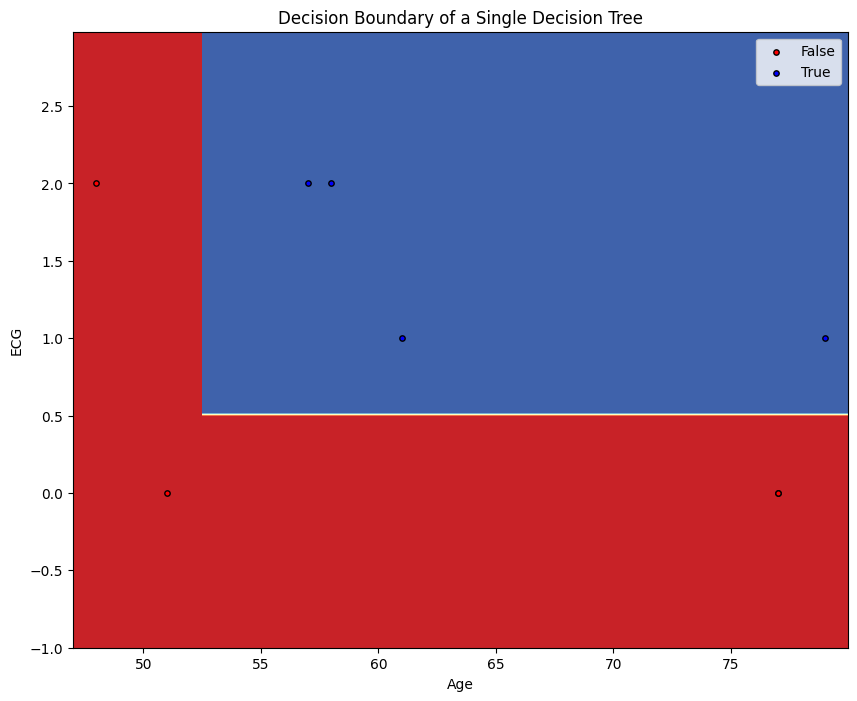

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


# Assuming we have the original data from problem 5 (based on the previous descriptions and manual calculations).
# Here is the data once more with binary encoding for the categorical variables for completeness:

# Data from the problem
data = pd.DataFrame({
    'Bp_change': ['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'Tightness_in_chest': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'ECG': ['Normal', 'Hypertrophy', 'Normal', 'Abnormal', 'Abnormal', 'Hypertrophy', 'Normal', 'Abnormal'],
    'Age': [51, 61, 77, 48, 57, 79, 77, 58],
    'Cardiac_arrest': [False, True, False, False, True, True, False, True]
})

# Mapping categorical variables to integers
data['Bp_change'] = data['Bp_change'].map({'Yes': 1, 'No': 0})
data['Tightness_in_chest'] = data['Tightness_in_chest'].map({'Yes': 1, 'No': 0})
data['ECG'] = data['ECG'].map({'Normal': 0, 'Hypertrophy': 1, 'Abnormal': 2})
data['Cardiac_arrest'] = data['Cardiac_arrest'].map({True: 1, False: 0})

# Features and target variable
X = data[['Age', 'ECG']].values
y = data['Cardiac_arrest'].values

# Train a single decision tree classifier on the whole dataset to mimic the random forest's behavior
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Plotting decision boundaries
plot_colors = "rb"
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predictions for the grid
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['False', 'True'][i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.xlabel('Age')
plt.ylabel('ECG')
plt.title('Decision Boundary of a Single Decision Tree')
plt.legend()
plt.show()


## Problem 2

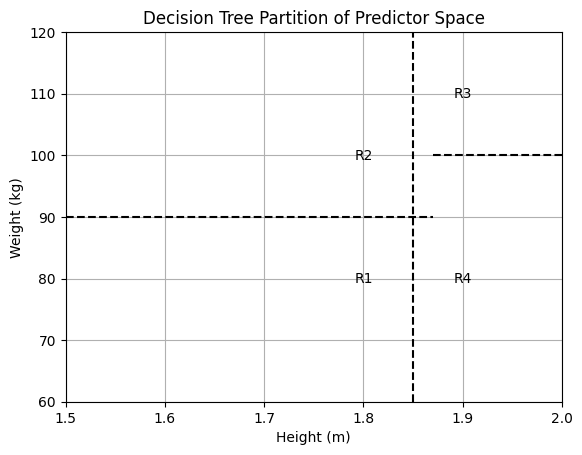

In [3]:
import matplotlib.pyplot as plt

# Define the split thresholds
x_split = 1.85
y_split_left = 90
y_split_right = 100

# Define the region labels
labels = {
    'R1': (1.8, 80),  
    'R2': (1.8, 100), 
    'R3': (1.9, 110), 
    'R4': (1.9, 80),  
}

# Create figure and axis
fig, ax = plt.subplots()

# Draw the vertical line for height split
ax.axvline(x=x_split, color='k', linestyle='--')

# Draw the horizontal lines for weight split
ax.axhline(y=y_split_left, xmin=0, xmax=x_split/2.5, color='k', linestyle='--') # scale xmin appropriately
ax.axhline(y=y_split_right, xmin=x_split/2.5, xmax=1, color='k', linestyle='--') # scale xmax appropriately

# Annotate the regions R1, R2, R3, R4
for region, position in labels.items():
    ax.text(position[0], position[1], region, verticalalignment='center', horizontalalignment='center')

# Set the labels and titles
ax.set_xlabel('Height (m)')
ax.set_ylabel('Weight (kg)')
ax.set_title('Decision Tree Partition of Predictor Space')

# Set the x and y axis limits
ax.set_xlim(1.5, 2)
ax.set_ylim(60, 120)

# Display the plot
plt.grid(True)
plt.show()
